# About Dataset

**Milk Quality Prediction (Classification)**

**About dataset**

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

**Usage**

The target variable is nothing but the Grade of the milk. It can be

Target

Low (Bad)

Medium (Moderate)

High (Good)

If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.
Temperature and ph are given their actual values in the dataset.

We have to perform data preprocessing, and data augmentation techniques to build statistical and predictive models to predict the quality of the milk.

**Inspiration**

To leverage the benefits of machine learning in the dairy industry.

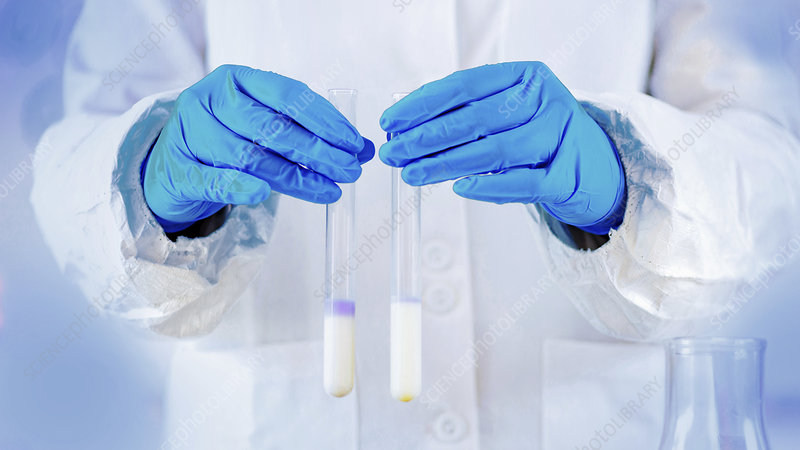

In [ ]:
import warnings

import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost as xgb
import ydata_profiling as pp
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

%matplotlib inline

sns.set_style("darkgrid")

In [ ]:
df = pd.read_csv("milknew.csv")

Gaining General over view of the data

In [ ]:
# Stripping any white space in the column names

df.columns = df.columns.str.strip()

In [ ]:
# Renaming the Column name Temprature to Temperature

df.rename(columns={"Temprature": "Temperature"}, inplace=True)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
profile_report = pp.ProfileReport(df)

profile_report.to_file("ProfileReport.html")

profile_report

**Observation**

There are 976 duplicate rows accounting for 92.16% of the data

However since the number is too high to drop and after close analysis, there is a chance milk can have same qualities as in the features

In [ ]:
print("There are", df.duplicated().sum(), "duplicated values")

percentage_dupl = round((df.duplicated().sum()) / df.shape[0] * 100, 2)

print("Duplicated values account for ", percentage_dupl, "%")

df[df.duplicated()].reset_index(drop=True)

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
df.columns

In [ ]:
def pie_plots(features):
    num_features = len(features)

    num_cols = 2

    num_rows = (num_features + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 5 * num_rows))

    for i, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.pie(
            df[feature].value_counts(), labels=df[feature].unique(), autopct="%1.1f%%"
        )
        plt.title(f"Proportion of {feature}")

    plt.tight_layout()
    plt.show()


# Assuming df is your DataFrame
binary_features = ["Taste", "Odor", "Fat", "Turbidity", "Grade", "Colour"]
pie_plots(binary_features)

**Observation**

1. Presence of Taste and Fat was detected in many instances at 54.7% and 67.1% respectively

2. Odor and Turbidity wasnt as weren't as satisfied with a proportion of 56.8 and 50.9 percent of no satisfaction respectively

3. High Grade was more prevalent than the rest of the grades

4. Color 254 was the most dominant observation

In [ ]:
features = ["pH", "Temperature"]

num_features = len(features)

num_cols = 2

num_rows = (num_features + num_cols - 1) // num_cols

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)

    sns.histplot(x=df[feature], kde=True)

    plt.grid(False)

    plt.title(f"The Distribution of {feature}")

plt.tight_layout()

plt.show()

**Observation**

1. From the KDE it is worth noting that the pH has one Gaussian, indication of a roughly normal distribution

2. Temperature Distribution has one Gaussian as well but is more skewed to the right, indication of possible outliers

In [ ]:
features = df.drop(columns="Grade").columns.tolist()

num_features = len(features)

num_cols = 3

num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(10, 4 * num_rows))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)

    sns.kdeplot(df[feature])

    plt.title(f"Kde plot showing the distribution of {feature}")

plt.tight_layout()

plt.show()

**Observation**
1. Taste, Odor, Fat, Turbidity, have 2 Gaussians due to the fact that there are only two unique values in them

2. Color has multiple Gaussians inferring presence of subpopulations or clusters

In [ ]:
features = df.drop(columns="Grade").columns.tolist()

num_features = len(features)

num_cols = 2

num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(10, 3 * num_rows))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)

    sns.histplot(df[feature])

    plt.title(f"{feature} Distribution")

plt.tight_layout()

plt.show()

## Bivariate Analysis

In [ ]:
sns.pairplot(df, diag_kind="kde", hue="Grade")
plt.grid(False)

In [ ]:
features = df.drop(columns="Grade").columns.tolist()

num_features = len(features)

num_cols = 2

num_rows = (num_features + num_cols - 1) // num_cols

palettes = [
    "deep",
    "pastel",
    "bright",
    "muted",
    "colorblind",
    "husl",
    ["#FF0000", "#00FF00", "#0000FF"],
]

plt.figure(figsize=(10, 3 * num_rows))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)

    # Select the palette for the current iteration
    current_palette = palettes[i % len(palettes)]

    sns.set_palette(current_palette)

    sns.barplot(x=df["Grade"], y=df[feature])

    plt.title(f"Grade against {feature}")

plt.tight_layout()

plt.show()

In [ ]:
features = df.drop(columns="Grade").columns.tolist()

num_features = len(features)

num_cols = 2

num_rows = (num_features + num_cols - 1) // num_cols

palettes = [
    "deep",
    "pastel",
    "bright",
    "muted",
    "colorblind",
    "husl",
    ["#FF0000", "#00FF00", "#0000FF"],
]

plt.figure(figsize=(10, 3 * num_rows))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)

    # Select the palette for the current iteration
    current_palette = palettes[i % len(palettes)]

    sns.set_palette(current_palette)

    sns.violinplot(x=df["Grade"], y=df[feature])

    plt.title(f"Grade against {feature}")

plt.tight_layout()

plt.show()

## Multivariate Analysis

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="viridis", vmin=-1, vmax=1)

# Data Modelling


In [ ]:
df.corr()

**Data Encoding**

In [ ]:
encoder = LabelEncoder()

df["Grade"] = encoder.fit_transform(df["Grade"])

In [ ]:
X = df.drop(columns="Grade")

y = df["Grade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Scaling the data to a mean of 0 and a standard deviation of 1**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

**XGBoost Classifier**

In [ ]:
xgbClassifier = xgb.XGBClassifier()

xgbClassifier.fit(X_train_scaled, y_train)

ypred_train = xgbClassifier.predict(X_train_scaled)

ypred_test = xgbClassifier.predict(X_test_scaled)

print("Training accuracy score:", xgbClassifier.score(X_train_scaled, y_train))

print("Testing accuracy score:", xgbClassifier.score(X_test_scaled, y_test))

xgb_cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(xgb_cm, annot=True, cmap="coolwarm")

plt.title("Confusion matrix for the XGBoost Classifier Model")

xgb_pred = xgbClassifier.predict(X_test_scaled)

class_report = classification_report(y_test, xgb_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train_scaled, y_train)

ypred_train = rf.predict(X_train_scaled)

ypred_test = rf.predict(X_test_scaled)

print("Training accuracy score:", rf.score(X_train_scaled, y_train))

print("Testing accuracy score:", rf.score(X_test_scaled, y_test))

rf_cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(rf_cm, annot=True, cmap="Purples")

plt.title("Confusion matrix for the Random Forest Classifier Model")

rf_pred = rf.predict(X_test_scaled)

class_report = classification_report(y_test, rf_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**ExtraTreesClassifier**

In [ ]:
et = ExtraTreesClassifier(n_estimators=100)

et.fit(X_train_scaled, y_train)

ypred_train = et.predict(X_train_scaled)

ypred_test = et.predict(X_test_scaled)

print("Training accuracy score:", et.score(X_train_scaled, y_train))

print("Testing accuracy score:", et.score(X_test_scaled, y_test))

et_cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(et_cm, annot=True, cmap="BuPu")

plt.title("Confusion matrix for the  ExtraTrees Classifier Model")

et_pred = xgbClassifier.predict(X_test_scaled)

class_report = classification_report(y_test, et_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**Logistic Regression Classifier**

In [ ]:
lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

ypred_train = lr.predict(X_train_scaled)

ypred_test = lr.predict(X_test_scaled)

print("Training accuracy score:", lr.score(X_train_scaled, y_train))

print("Testing accuracy score:", lr.score(X_test_scaled, y_test))

# Create the confusion matrix for the test data
cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(cm, annot=True, cmap="viridis")

plt.title("Confusion Matrix for the Logistic Regression Classifier Model")

lr_pred = lr.predict(X_test_scaled)

class_report = classification_report(y_test, lr_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**K Nearest Neighbors Classifier**

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

ypred_train = knn.predict(X_train_scaled)

ypred_test = knn.predict(X_test_scaled)

print("Training accuracy score:", knn.score(X_train_scaled, y_train))

print("Testing accuracy score:", knn.score(X_test_scaled, y_test))

knn_pred = knn.predict(X_test_scaled)

knn_cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(knn_cm, annot=True, cmap="YlGnBu")

plt.title("Confusion Matrix for the KNeighbors Classifier Model")

class_report = classification_report(y_test, knn_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**Light Gradient Boosting Classifier**

In [ ]:
classifier = lgb.LGBMClassifier()

classifier.fit(X_train_scaled, y_train)

y_pred_train = classifier.predict(X_train_scaled)

y_pred_test = classifier.predict(X_test_scaled)

print("Training accuracy score:", classifier.score(X_train_scaled, y_train))

print("Testing accuracy score:", classifier.score(X_test_scaled, y_test))

lgb_cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(lgb_cm, annot=True, cmap="Oranges")

plt.title("Confusion Matrix for the Light Gradient Boosting Classifier Model")

lgb_pred = classifier.predict(X_test_scaled)

class_report = classification_report(y_test, lgb_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**Decision Trees Classifier**

In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train_scaled, y_train)

ypred_train = dtc.predict(X_train_scaled)

ypred_test = dtc.predict(X_test_scaled)

print("Training accuracy score:", dtc.score(X_train_scaled, y_train))

print("Testing accuracy score:", dtc.score(X_test_scaled, y_test))

dtc_cm = confusion_matrix(y_test, ypred_test)

sns.heatmap(dtc_cm, annot=True, cmap="Greens")

plt.title("Confusion Matrix for the DecisionTree Classifier Model")

dt_pred = dtc.predict(X_test_scaled)

class_report = classification_report(y_test, dt_pred, output_dict=True)

class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

**Chris**